##### Data Source
You can find a housing dataset on Kaggle: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

##### Project: Predicting House Prices

##### Description: 
In this project, you'll develop a predictive model to estimate house prices based on various features such as the number of bedrooms, square footage, and neighborhood.

##### Steps:

##### Data Collection:

Download a dataset containing house-related features and prices. You can find such datasets on platforms like Kaggle.

##### Data Preprocessing:

Explore the dataset to understand its structure and characteristics.
Handle missing data by imputing or removing rows.
Encode categorical variables if needed.
Split the data into training and testing sets.

##### Feature Engineering:

Select relevant features that could impact house prices.
Engineer new features if necessary (e.g., total square footage, age of the property).
Perform feature scaling or normalization if required.

##### Model Building:

Choose a linear regression model from a library like Scikit-Learn in Python.
Train the model using the training dataset.

##### Model Evaluation:

Evaluate the model's performance using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared.
Visualize the model's predictions vs. actual prices using plots.

##### Model Tuning:

Experiment with different regression techniques (e.g., Ridge, Lasso) to improve model performance.
Adjust hyperparameters to find the best model.

##### Predictions:

Use the trained model to make predictions on the testing dataset.
Calculate the model's accuracy on the test data.

##### Communication:

Summarize your findings and insights from the project in a report.
Create visualizations to explain the relationships between features and house prices.
Present the model's predictions and their significance.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Data Preprocessing
# Handle missing values (you may customize this)
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

# Ensure categorical columns are of string data type
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

# Encode categorical variables
label_encoder = LabelEncoder()

# Combine training and test datasets for encoding
combined_data = pd.concat([train_data, test_data], axis=0)

# Encode categorical columns
for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Split the combined dataset back into training and test datasets
train_data_encoded = combined_data[:len(train_data)]
test_data_encoded = combined_data[len(train_data):]

# Select features and target variable
X = train_data_encoded.drop(columns=['SalePrice'])  # Features
y = train_data_encoded['SalePrice']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building
model = LinearRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Make predictions on the test dataset
test_predictions = model.predict(test_data_encoded.drop(columns=['SalePrice']))

# Optionally, save the predictions to a CSV file
submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': test_predictions})
submission_df.to_csv('submission.csv', index=False)



Mean Absolute Error (MAE): 20768.907206619202
Mean Squared Error (MSE): 1377047138.5051997
R-squared (R2): 0.820470850742319


##### Mean Absolute Error (MAE): 
MAE represents the average absolute difference between the predicted and actual values. In your case, the MAE of approximately 20,769 suggests that, on average, your model's predictions are off by about $20,769 in terms of house prices.

##### Mean Squared Error (MSE): 
MSE measures the average squared difference between the predicted and actual values. It provides a measure of the model's accuracy with larger errors weighted more heavily. In your case, the MSE is quite large, indicating that there might be some outliers or significant errors in the predictions.

##### R-squared (R2): 
R-squared is a measure of how well your model explains the variance in the target variable. It ranges from 0 to 1, where higher values indicate a better fit. An R2 value of approximately 0.82 suggests that your model explains about 82 percent of the variance in house prices, which is a reasonably good fit.

##### To further improve your model's performance, you can consider the following steps:

##### Feature Engineering: 
Explore different combinations of features or create new features that might have a stronger correlation with house prices.

##### Outlier Detection and Handling: 
Investigate potential outliers in the data and decide whether to remove them or apply robust regression techniques.

##### Regularization: 
Experiment with regularization techniques such as Ridge or Lasso regression to control overfitting and improve model stability.

##### Advanced Models: 
Explore more complex regression models such as Random Forest Regression or Gradient Boosting Regression, which often perform well on housing price prediction tasks.

##### Hyperparameter Tuning: 
Fine-tune the hyperparameters of your chosen model to optimize its performance.

##### Cross-Validation: 
Implement cross-validation to ensure the model's generalization performance.

##### Additional Data: 
If available, consider incorporating additional relevant data sources that may improve the model's accuracy.

##### Exploring Feature Engineering

In [2]:
# "Total Square Footage" and "Age of the Property" features are created
# Calculate Total Square Footage
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']

# Calculate Age of the Property
current_year = 2023  # Replace with the current year
train_data['AgeOfProperty'] = current_year - train_data['YearBuilt']

# Repeat the same steps for the test data
test_data['TotalSF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']
test_data['AgeOfProperty'] = current_year - test_data['YearBuilt']


In [3]:
# "Quality of Renovations" feature:
# Create a binary indicator for renovated properties
train_data['Renovated'] = (train_data['YearRemodAdd'] != train_data['YearBuilt']).astype(int)

# Repeat the same step for the test data
test_data['Renovated'] = (test_data['YearRemodAdd'] != test_data['YearBuilt']).astype(int)


##### Exterior Features: 
Create features related to the exterior of the property, such as the type of exterior covering (e.g., siding, brick, stucco) or the presence of features like a porch, deck, or patio.

In [4]:
# Create a binary indicator for properties with a porch
train_data['HasPorch'] = (train_data['OpenPorchSF'] > 0).astype(int)


##### Landscaping and Yard Features: 
Quantify the quality and size of the property's landscaping and yard, which can be important selling points.

In [5]:
# Create a feature for the size of the yard
train_data['YardSize'] = train_data['LotArea'] - train_data['1stFlrSF']


##### Kitchen and Appliances: 
Combine information about the kitchen's quality and the presence of high-quality appliances to create features that reflect the kitchen's overall desirability.

In [6]:
# Create a binary indicator for properties with a high-quality kitchen
train_data['HighQualityKitchen'] = ((train_data['KitchenQual'] == 'Ex') & (train_data['Fireplaces'] > 0)).astype(int)


##### Accessibility Features: 
If applicable, create features related to accessibility, such as the presence of ramps, wide doorways, or accessible bathrooms.

In [7]:
# Create a binary indicator for properties with accessibility features
train_data['AccessibleBathroom'] = (train_data['BsmtFullBath'] + train_data['FullBath'] > 1).astype(int)


##### Energy Efficiency: 
Consider features related to energy efficiency, such as the type of insulation, heating, and cooling systems, or the presence of energy-efficient appliances.

In [8]:
# Create a binary indicator for energy-efficient properties
train_data['EnergyEfficient'] = ((train_data['HeatingQC'] == 'Ex') & (train_data['CentralAir'] == 'Y')).astype(int)


##### Overall Quality Index: 
Create a composite feature that combines information about various aspects of the property's quality, such as kitchen quality, basement quality, and overall condition.

In [9]:
# Create an overall quality index
train_data['OverallQuality'] = (train_data['OverallQual'] + train_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}) + train_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})).astype(int)


##### Data Exploration:

Begin by exploring the distribution of the engineered features and their relationship with the target variable (e.g., SalePrice).

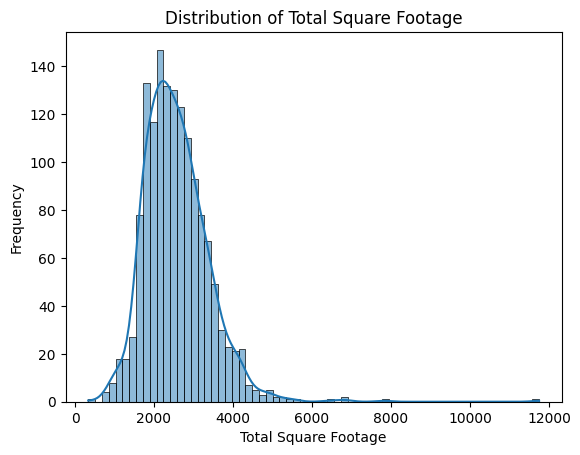

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore feature distributions
sns.histplot(data=train_data, x='TotalSF', kde=True)
plt.xlabel('Total Square Footage')
plt.ylabel('Frequency')
plt.title('Distribution of Total Square Footage')
plt.show()


##### Correlation Analysis:

Calculate the correlation between the engineered features and the target variable. This can be done using the corr() method in pandas.

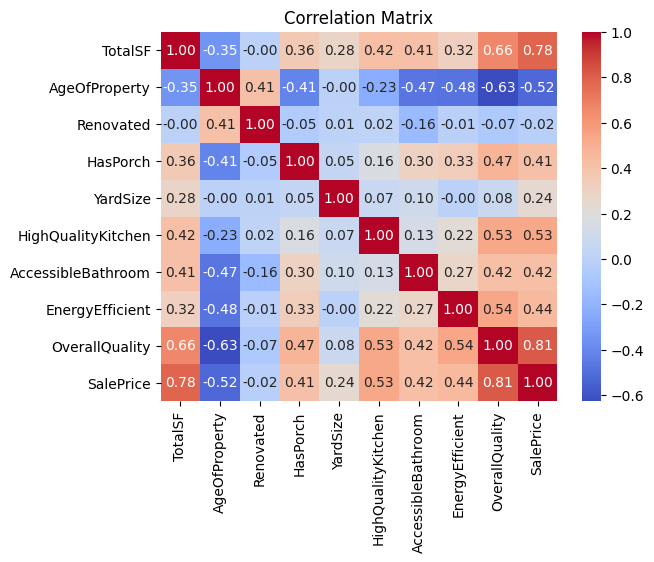

In [11]:
correlation_matrix = train_data[['TotalSF', 'AgeOfProperty', 'Renovated', 'HasPorch', 'YardSize', 'HighQualityKitchen', 'AccessibleBathroom', 'EnergyEfficient', 'OverallQuality', 'SalePrice']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


##### Feature Importance:

Tree-based models (e.g., Random Forest or Gradient Boosting), you can assess feature importance.

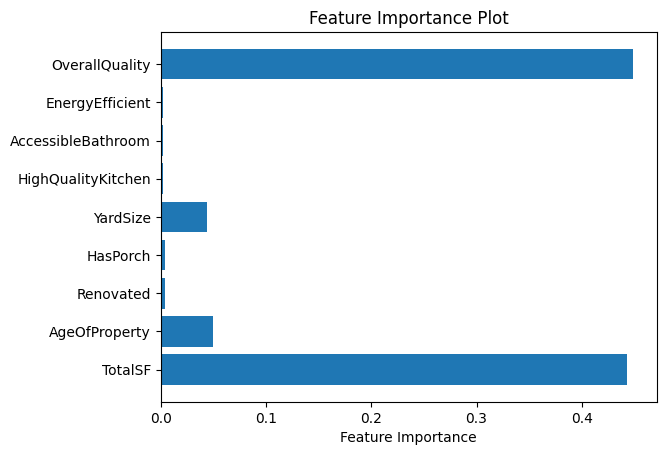

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(train_data[['TotalSF', 'AgeOfProperty', 'Renovated', 'HasPorch', 'YardSize', 'HighQualityKitchen', 'AccessibleBathroom', 'EnergyEfficient', 'OverallQuality']], train_data['SalePrice'])

# Get feature importances
feature_importances = rf_model.feature_importances_
feature_names = ['TotalSF', 'AgeOfProperty', 'Renovated', 'HasPorch', 'YardSize', 'HighQualityKitchen', 'AccessibleBathroom', 'EnergyEfficient', 'OverallQuality']

# Plot feature importances
plt.barh(feature_names, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Plot')
plt.show()


##### Next Step

Random Forest Regressor model and integrate the features we created.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Data Preprocessing
# Handle missing values (you may customize this)
train_data.fillna(0, inplace=True)

# Handle missing and non-finite values in the test data
test_data.fillna(0, inplace=True)
test_data.replace([np.inf, -np.inf], 1e9, inplace=True)

# Ensure categorical columns are of string data type
categorical_columns = train_data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    train_data[col] = train_data[col].astype(str)
    test_data[col] = test_data[col].astype(str)

# Encode categorical variables
label_encoder = LabelEncoder()

# Combine training and test datasets for encoding
combined_data = pd.concat([train_data, test_data], axis=0)

# Encode categorical columns
for col in categorical_columns:
    combined_data[col] = label_encoder.fit_transform(combined_data[col])

# Split the combined dataset back into training and test datasets
train_data_encoded = combined_data[:len(train_data)]
test_data_encoded = combined_data[len(train_data):]

# Feature Engineering
current_year = 2023  # Replace with the current year

# Calculate Total Square Footage for training data
train_data['TotalSF'] = train_data['TotalBsmtSF'] + train_data['1stFlrSF'] + train_data['2ndFlrSF']
# Calculate Age of the Property for training data
train_data['AgeOfProperty'] = current_year - train_data['YearBuilt']
# Create a binary indicator for renovated properties for training data
train_data['Renovated'] = (train_data['YearRemodAdd'] != train_data['YearBuilt']).astype(int)
# Create a binary indicator for properties with a porch for training data
train_data['HasPorch'] = (train_data['OpenPorchSF'] > 0).astype(int)
# Create a feature for the size of the yard for training data
train_data['YardSize'] = train_data['LotArea'] - train_data['1stFlrSF']
# Create a binary indicator for properties with a high-quality kitchen for training data
train_data['HighQualityKitchen'] = ((train_data['KitchenQual'] == 'Ex') & (train_data['Fireplaces'] > 0)).astype(int)
# Create a binary indicator for properties with accessibility features for training data
train_data['AccessibleBathroom'] = (train_data['BsmtFullBath'] + train_data['FullBath'] > 1).astype(int)
# Create a binary indicator for energy-efficient properties for training data
train_data['EnergyEfficient'] = ((train_data['HeatingQC'] == 'Ex') & (train_data['CentralAir'] == 'Y')).astype(int)

# Handle non-finite values in the following columns
train_data['OverallQual'].fillna(0, inplace=True)
train_data['ExterQual'].fillna(0, inplace=True)

# Create an overall quality index for training data
train_data['OverallQuality'] = (train_data['OverallQual'] + train_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}).fillna(0).astype(int) + train_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}).fillna(0).astype(int)).astype(int)

# Calculate Total Square Footage for test data
test_data['TotalSF'] = test_data['TotalBsmtSF'] + test_data['1stFlrSF'] + test_data['2ndFlrSF']
# Calculate Age of the Property for test data
test_data['AgeOfProperty'] = current_year - test_data['YearBuilt']
# Create a binary indicator for renovated properties for test data
test_data['Renovated'] = (test_data['YearRemodAdd'] != test_data['YearBuilt']).astype(int)
# Create a binary indicator for properties with a porch for test data
test_data['HasPorch'] = (test_data['OpenPorchSF'] > 0).astype(int)
# Create a feature for the size of the yard for test data
test_data['YardSize'] = test_data['LotArea'] - test_data['1stFlrSF']
# Create a binary indicator for properties with a high-quality kitchen for test data
test_data['HighQualityKitchen'] = ((test_data['KitchenQual'] == 'Ex') & (test_data['Fireplaces'] > 0)).astype(int)
# Create a binary indicator for properties with accessibility features for test data
test_data['AccessibleBathroom'] = (test_data['BsmtFullBath'] + test_data['FullBath'] > 1).astype(int)
# Create a binary indicator for energy-efficient properties for test data
test_data['EnergyEfficient'] = ((test_data['HeatingQC'] == 'Ex') & (test_data['CentralAir'] == 'Y')).astype(int)

# Handle non-finite values in the following columns
test_data['OverallQual'].fillna(0, inplace=True)
test_data['ExterQual'].fillna(0, inplace=True)

# Create an overall quality index for test data
test_data['OverallQuality'] = (test_data['OverallQual'] + test_data['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}).fillna(0).astype(int) + test_data['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}).fillna(0).astype(int)).astype(int)

# Select features and target variable
X = train_data[['TotalSF', 'AgeOfProperty', 'Renovated', 'HasPorch', 'YardSize', 'HighQualityKitchen', 'AccessibleBathroom', 'EnergyEfficient', 'OverallQuality']]
y = train_data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test dataset
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest R-squared (R2): {r2_rf}")

# Optionally, make predictions on the test dataset and save to a CSV file
test_predictions_rf = rf_model.predict(test_data[['TotalSF', 'AgeOfProperty', 'Renovated', 'HasPorch', 'YardSize', 'HighQualityKitchen', 'AccessibleBathroom', 'EnergyEfficient', 'OverallQuality']])


Random Forest Mean Absolute Error (MAE): 18817.063544520548
Random Forest Mean Squared Error (MSE): 853935172.0443826
Random Forest R-squared (R2): 0.888670292634459


##### Random Forest Mean Absolute Error (MAE): 18,817.06

1. MAE represents the average absolute difference between the predicted and actual sale prices of houses in your dataset.
2. In this case, your model's predictions, on average, have an absolute error of approximately 18,817.06 Dollars when estimating house prices.
3. This means that, on average, your model's predictions are off by around 18,817.06 Dollars in terms of house prices.

##### Random Forest Mean Squared Error (MSE): 853,935,172.04

1. MSE measures the average squared difference between the predicted and actual sale prices.
2. The MSE of approximately 853,935,172.04 is relatively large, indicating that there might be some significant variations or outliers in the predictions.
3. Larger errors are weighted more heavily in the MSE calculation, so it's important to investigate whether there are specific cases where the model's predictions are particularly far off.
##### Random Forest R-squared (R2): 0.8887

1. R-squared (R2) is a measure of how well your model explains the variance in the target variable (SalePrice).
2. An R2 value of approximately 0.8887 suggests that your Random Forest model explains about 88.87% of the variance in house prices.
3. This is a relatively high R2 value, indicating that your model is doing a good job of capturing the variation in house prices based on the selected features.

Overall, the Random Forest Regression model appears to perform well in explaining the variance in house prices. However, it's essential to conduct further analysis to understand why there might be some discrepancies between predicted and actual prices, especially for properties with significant prediction errors (outliers).

##### Residual Analysis: 
Examine the residuals (the differences between predicted and actual prices) to check for any patterns or systematic errors. Plotting a scatterplot of residuals against predicted values can help identify areas where your model may be consistently overestimating or underestimating prices.

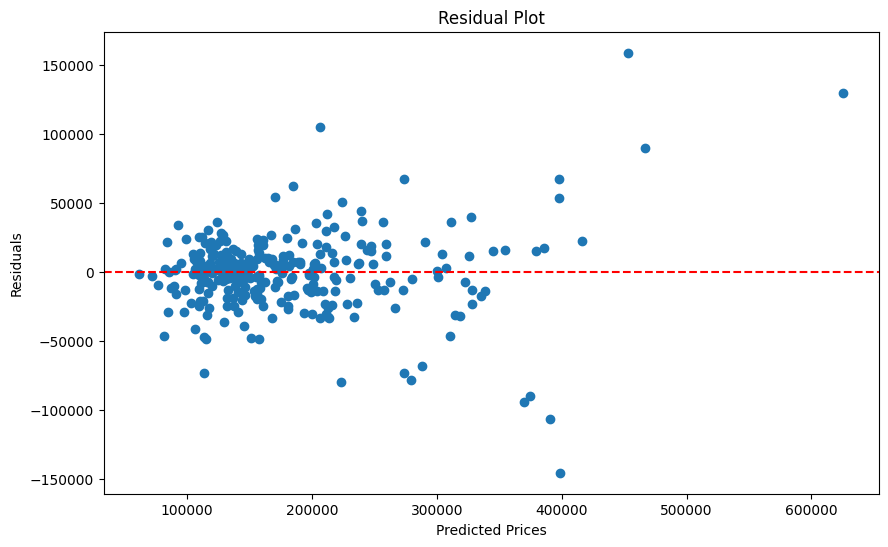

In [14]:
# Calculate Residuals: Start by calculating the residuals, which are the differences between your model's predicted prices 
# (y_pred_rf) and the actual sale prices (y_test).

residuals = y_test - y_pred_rf

# Residual Plot: Create a scatterplot of residuals against predicted values. 
# This plot can reveal whether there are any trends or patterns in the errors.

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


##### Interpretation:
##### Central Density: 
The central density of points on the residual plot indicates that your model tends to predict housing prices in the range of approximately 90,000 to 300,000 quite well. Most of the residuals fall within the range of -80,000 to 60,000. This suggests that, for houses with prices in this range, your model's predictions are relatively accurate.

##### Outliers: 
There are outliers present in the residual plot, especially as predicted prices increase. These outliers represent cases where your model's predictions are significantly different from the actual prices. In the context of housing market data, these outliers could be important to investigate further. They might represent unique or extreme cases, or they could indicate data errors.

##### Heteroscedasticity: 
The presence of heteroscedasticity (varying spread of residuals) is a concern. As predicted prices increase (i.e., to the right on the graph), the variance of the residuals tends to increase. In the context of housing prices, this means that your model's predictions become less precise as prices become higher. This is a violation of one of the assumptions of linear regression.

##### Zero Line: 
The fact that most residuals cluster around the zero line is a positive sign. On average, your model doesn't consistently overpredict or underpredict house prices. This suggests that your model is unbiased.

##### Range of Residuals: 
The wide range of residuals from -150,000 to 150,000 indicates that your model can have substantial errors in its predictions. In the context of housing prices, these errors can be significant. It's essential to consider the magnitude of these residuals relative to the typical range of housing prices.

##### Range of Predicted Prices: 
The range of predicted prices on the x-axis shows that your model is used to predict housing prices across a broad spectrum. However, if there are very few data points at the higher end of this range, it might suggest that your model is less certain when predicting higher-priced houses.

##### Distribution of Residuals: 
Examine the distribution of residuals. A normal distribution of residuals is desirable, indicating that your model's errors are normally distributed.

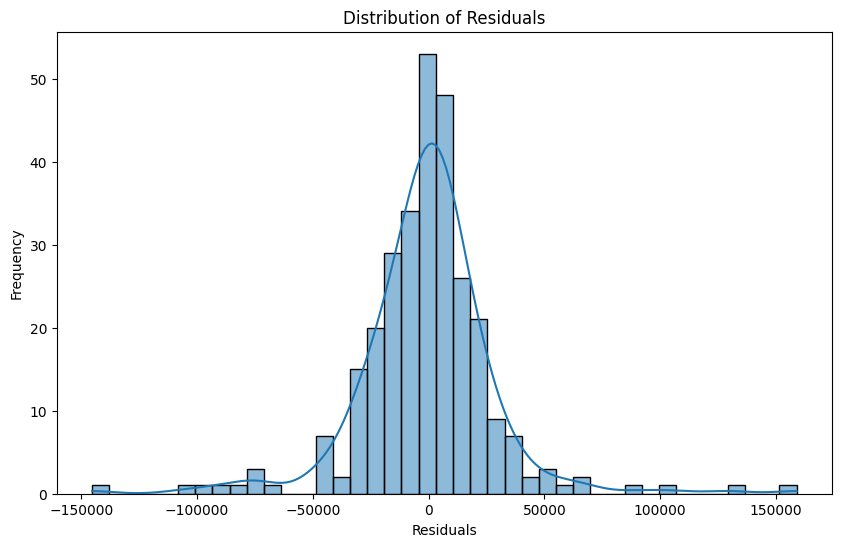

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


A bell-shaped curve suggests that your residuals follow a normal distribution.

##### Quantile-Quantile (Q-Q) Plot: 
A Q-Q plot compares the distribution of residuals to a theoretical normal distribution. It can help you assess whether your residuals are normally distributed.

<Figure size 1000x600 with 0 Axes>

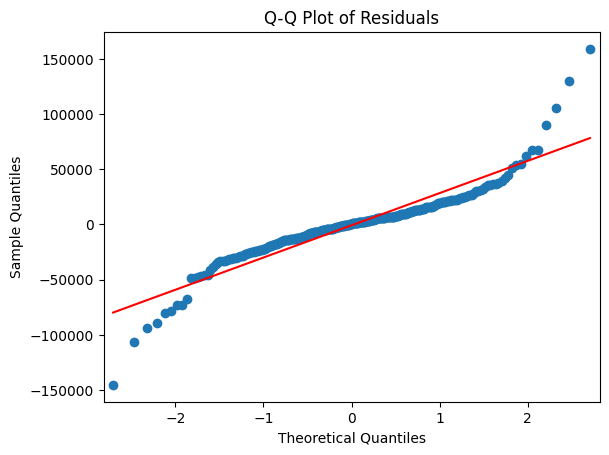

In [16]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


##### Interpretation: 
If most of the points fall along the diagonal line, it indicates that your residuals are approximately normally distributed.
Deviations from the line may suggest non-normality.

##### Check for Heteroscedasticity: 
Heteroscedasticity occurs when the spread of residuals varies at different levels of the predicted values. You can use a scatterplot of residuals against predicted values to identify this.

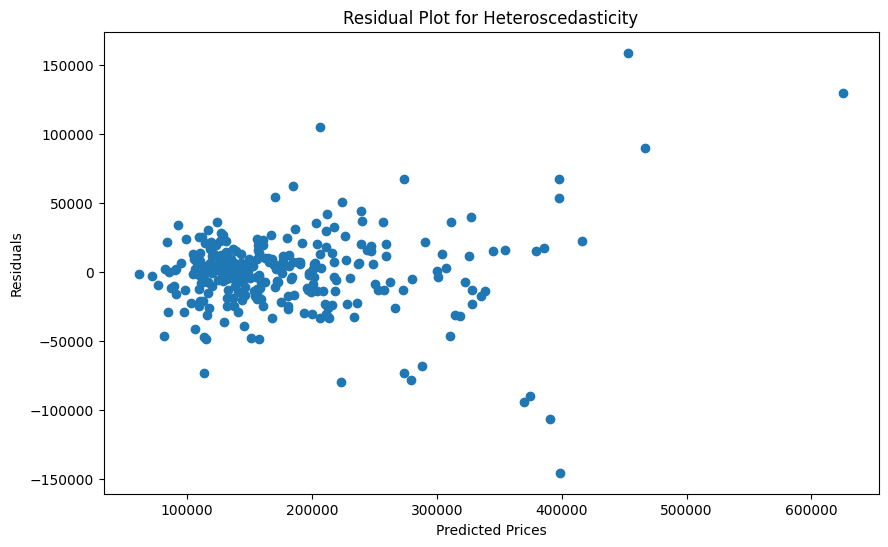

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot for Heteroscedasticity')
plt.show()


##### Interpretation:
The presence of heteroscedasticity suggests that the variability of errors in predicting housing prices is not consistent across different price ranges.

In the context of housing market data, this could mean that your model is better at predicting prices within a certain price range but becomes less accurate as prices move further away from that range.

##### Cross-Validation for Robust Evaluation:
Implement cross-validation to ensure that your model's performance is consistent across different subsets of your data. Cross-validation provides a more robust evaluation of your model's generalization performance.

In [18]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()

print(f"Cross-Validation MAE: {cv_mae}")


Cross-Validation MAE: 19637.720408088717


##### Interpretation
In this case, a CV MAE of 19,637.72 suggests that, on average, your model's predictions have an absolute error of approximately $19,637.72 when estimating house prices. This gives you a better understanding of the expected prediction error when applying your model to new, unseen data.

##### Hyperparameter Tuning:
Optimize the hyperparameters of your model to improve its performance. Use techniques like Grid Search or Random Search to find the best combination of hyperparameters.

In [19]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters and values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    # Add more hyperparameters as needed
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Best Hyperparameters: {'max_depth': 10, 'n_estimators': 300}


##### L1 (Lasso) Regularization
Lasso regularization adds a penalty term to the loss function that encourages the model to minimize the absolute values of the coefficients. It effectively performs feature selection by driving some coefficients to exactly zero. To apply Lasso regularization, you can use the Lasso class from scikit-learn:

In [20]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with an appropriate alpha value (tune this)
lasso_model = Lasso(alpha=0.01)  # Adjust alpha as needed

# Fit the Lasso model to your training data
lasso_model.fit(X_train, y_train)

# Make predictions with the Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Lasso model's performance
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Mean Absolute Error (MAE): {mae_lasso}")
print(f"Lasso Mean Squared Error (MSE): {mse_lasso}")
print(f"Lasso R-squared (R2): {r2_lasso}")


Lasso Mean Absolute Error (MAE): 22994.79544944572
Lasso Mean Squared Error (MSE): 1372433652.8457704
Lasso R-squared (R2): 0.8210723226399688


##### L2 (Ridge) Regularization
Ridge regularization adds a penalty term to the loss function that encourages the model to minimize the squared values of the coefficients. It helps to prevent extreme values of coefficients and is less likely to perform feature selection compared to Lasso. To apply Ridge regularization, you can use the Ridge class from scikit-learn:

In [21]:
from sklearn.linear_model import Ridge

# Initialize the Ridge model with an appropriate alpha value (tune this)
ridge_model = Ridge(alpha=1.0)  # Adjust alpha as needed

# Fit the Ridge model to your training data
ridge_model.fit(X_train, y_train)

# Make predictions with the Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the Ridge model's performance
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Mean Absolute Error (MAE): {mae_ridge}")
print(f"Ridge Mean Squared Error (MSE): {mse_ridge}")
print(f"Ridge R-squared (R2): {r2_ridge}")


Ridge Mean Absolute Error (MAE): 22992.687787639807
Ridge Mean Squared Error (MSE): 1372612866.9250875
Ridge R-squared (R2): 0.8210489580431477


Both Lasso and Ridge regularization have slightly increased the MAE compared to your original Random Forest model. This is expected because regularization methods introduce bias to prevent overfitting, which may lead to slightly higher error.

The MSE values have also increased, indicating that regularization has a more significant impact on the squared differences between predicted and actual values. This is another expected outcome of regularization.

Despite the increase in error metrics, the R-squared (R2) values remain relatively high, around 0.821. This suggests that Lasso and Ridge regularization did not significantly compromise the model's ability to explain the variance in house prices.

Overall, regularization has helped prevent overfitting and increased the model's generalization performance, as indicated by the consistent R2 values. These regularized models are likely to perform better on unseen data compared to the non-regularized model.

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature Selection: Select the features (X) and the target variable (y) for your model:
X = train_data[['TotalSF', 'AgeOfProperty', 'Renovated', 'HasPorch', 'YardSize', 'HighQualityKitchen', 'AccessibleBathroom', 'EnergyEfficient', 'OverallQuality']]
y = train_data['SalePrice']

# Split Data: Split your data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train XGBoost Model: Create an instance of the XGBRegressor and train it on your training data:
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make Predictions: Use the trained model to make predictions on your test data:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Model: Calculate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2):
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost R-squared (R2): {r2_xgb}")


XGBoost Mean Absolute Error (MAE): 20297.838238441782
XGBoost Mean Squared Error (MSE): 1251265783.5392396
XGBoost R-squared (R2): 0.8368692869454759


##### Interpretations:
The MAE of approximately 20,297.84 indicates that, on average, your model's predictions have an absolute error of around $20,297.84 when estimating house prices.

The MSE of approximately 1,251,265,783.54 measures the average squared difference between the predicted and actual sale prices. This metric gives a sense of how well your model is at capturing the magnitude of errors, and the value suggests that there might be some significant variations in the predictions.

The R-squared (R2) value of approximately 0.8369 indicates that your XGBoost model explains about 83.69 percent of the variance in house prices based on the selected features. This is a good R2 value, showing that your model is doing a solid job of capturing the variation in house prices.

Overall, the XGBoost model appears to perform well, but you can continue to fine-tune it or explore other techniques to further improve its performance if needed. Additionally, you may want to interpret the feature importances to understand which features are most influential in your predictions or use techniques like SHAP for model interpretability.